In [1]:
import matplotlib.colors as mcolors
import matplotlib.animation as ma
import matplotlib.pyplot as plt
from multiprocessing import Pool
from tqdm.notebook import tqdm
from itertools import product
import pandas as pd
import numpy as np
import numba as nb
import imageio
import sys
import os
import shutil

randomSeed = 100

%matplotlib inline
%config InlineBackend.figure_format = "retina"

new_cmap = mcolors.LinearSegmentedColormap.from_list(
    "new", plt.cm.hsv(np.linspace(0, 1, 256)) * 0.85, N=256
)

@nb.njit
def colors_idx(phaseTheta):
    return np.floor(256 - phaseTheta / (2 * np.pi) * 256).astype(np.int32)

import seaborn as sns
import matplotlib.font_manager as fm

sns.set_theme(font_scale=1.1, rc={
    'figure.figsize': (6, 5),
    'axes.facecolor': 'white',
    'figure.facecolor': 'white',
    'grid.color': '#dddddd',
    'grid.linewidth': 0.5,
    "lines.linewidth": 1.5,
    'text.color': '#000000',
    'figure.titleweight': "bold",
    'xtick.color': '#000000',
    'ytick.color': '#000000'
})
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['mathtext.fontset'] = "cm"

from main import *


In [55]:
absValue = 1
pinPosition = np.array([
    [absValue, -absValue],
    [-absValue, absValue],
    # [-absValue, -absValue],
    [absValue, absValue]
])
model = PathPlanningSw(K=1, Jsw=-4, Jpin=50, pinPosition=pinPosition, agentsNum=50,
                       tqdm=True)
self = model

In [56]:
model.run(4000)

  0%|          | 0/4000 [00:00<?, ?it/s]

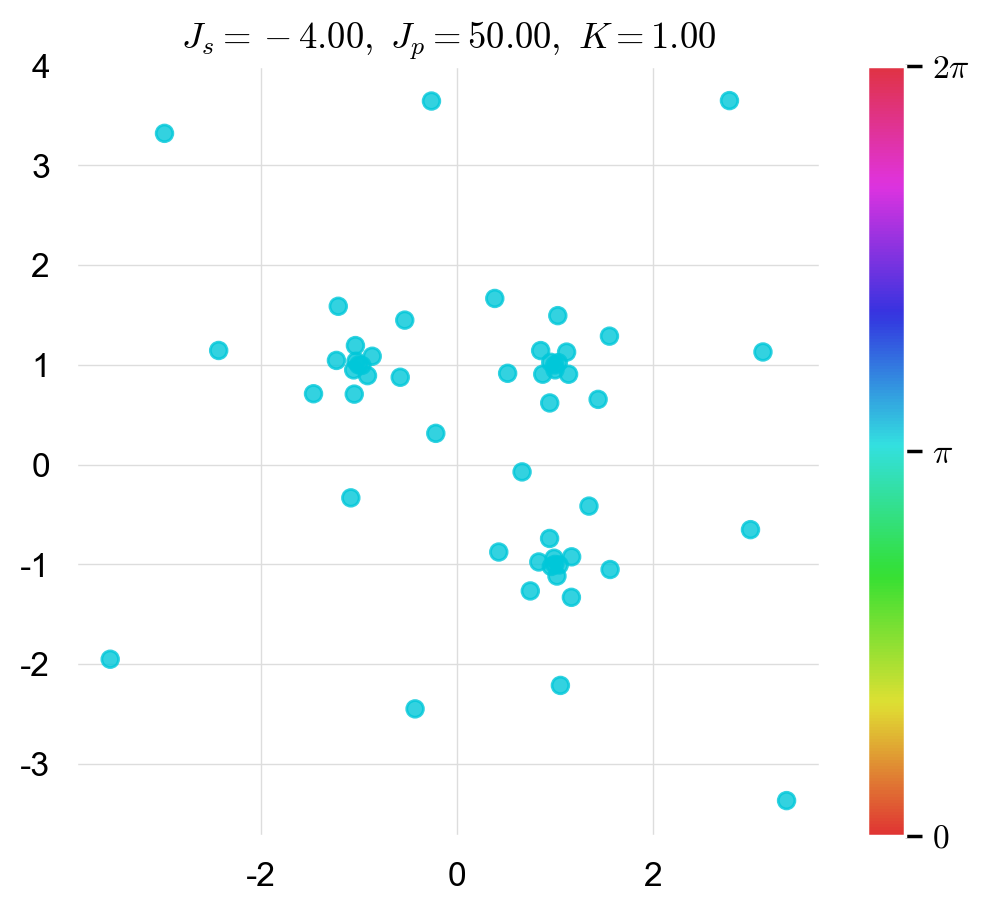

In [57]:
fig, ax = plt.subplots(figsize=(6, 5))

sc = ax.scatter(
    self.positionX[:, 0], self.positionX[:, 1],
    c=self.phaseTheta, cmap=new_cmap, alpha=0.8, vmin=0, vmax=2*np.pi
)

cbar = plt.colorbar(sc, ticks=[0, np.pi, 2*np.pi], ax=ax)
cbar.ax.set_ylim(0, 2*np.pi)
cbar.ax.set_yticklabels(['$0$', '$\pi$', '$2\pi$'])
ax.set_title(r"$J_{s}=" + rf"{self.Jsw:.2f}" +
             r",\ J_{p}=" + f"{self.Jpin:.2f},\ K={self.K:.2f}$")
boundsLim = 2
# plt.xlim(-boundsLim, boundsLim)
# plt.ylim(-boundsLim, boundsLim)
# plt.scatter(pinPosition[:, 0], pinPosition[:, 1], c='red', s=100)